In [ ]:
""" 
      Analyst : JAINAM SHAH
      
      Project : TITANIC DATASET ANALYSIS
      
      Purpose : Survival Analysis
-------------------------------------------------------
Operations to be performed:
     -> Data Cleaning

     -> Survival/Deceased Ratio /
     -> Survival/Deceased by male and female
     -> Survival/Deceased by FARE PRICE/also terming as PCLASS
     -> Survival/Deceased by Embarked
"""

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
cd C:\Users\Jammy\OneDrive\Desktop\Data analysis PDFs\EDA Exploratory data analysis\EDA Sets to Practice\Titanic EDA

C:\Users\Jammy\OneDrive\Desktop\Data analysis PDFs\EDA Exploratory data analysis\EDA Sets to Practice\Titanic EDA


In [5]:
tia = pd.read_csv("Titanic.csv")

In [6]:
tia.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
tia[tia.columns]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
tia.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
tia.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# DATA CLEANING 

In [10]:
"""As from above data we can see that there are 2 columns which have null values namely:
    ->Age 
    ->Cabin """

'As from above data we can see that there are 2 columns which have null values namely:\n    ->Age \n    ->Cabin '

#### Age

In [11]:
tia.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

#Above nan value indicate null

In [12]:
tia[tia.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


#about 177 rows in the column age have null values

In [15]:
tia["Age"] = np.around(tia["Age"])
tia["Age"]


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [16]:
tia.Age.median()

28.0

In [17]:
tia["Age"].fillna(tia["Age"].median(),inplace = True)

In [18]:
tia.Age.unique()

array([22., 38., 26., 35., 28., 54.,  2., 27., 14.,  4., 58., 20., 39.,
       55., 31., 34., 15.,  8., 19., 40., 66., 42., 21., 18.,  3.,  7.,
       49., 29., 65.,  5., 11., 45., 17., 32., 16., 25.,  1., 30., 33.,
       23., 24., 46., 59., 71., 37., 47., 70., 12.,  9., 36., 51., 56.,
       44., 61., 50., 62., 41., 52., 63., 43., 60., 10., 64., 13., 48.,
       53., 57., 80.,  6.,  0., 74.])

In [19]:
tia.Age.isnull().sum()

0

In [20]:
tia.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#Null values in Age column have been replaced by the column's median which is 28

In [21]:
tia["Age"].value_counts()

28.0    204
24.0     32
22.0     27
30.0     27
18.0     26
       ... 
12.0      1
53.0      1
80.0      1
66.0      1
0.0       1
Name: Age, Length: 71, dtype: int64

###### -x

#### CABIN

As you can see cabin has 687 null values , We can either drop the column or have the null values replaced

In [22]:
tia["Cabin"].fillna("Not Known",inplace = True)

In [23]:
tia.Cabin.isnull().sum()

0

In [34]:
tia.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          2
Fare_Category    53
dtype: int64

#We have taken care of all the null values in Cabin column by changing nulls with Not_Known , we could also have dropped the entire column which would have been better as majority of values are null


#### Embarked

In [37]:
tia.Embarked.isnull().sum()

2

In [38]:
tia.Embarked.mode()[0]

'S'

In [39]:
tia["Embarked"] = tia["Embarked"].fillna(tia["Embarked"].mode()[0])

In [41]:
tia.Embarked.isnull().sum()

0

# Univariate Analysis


Univariate Analysis will contain single column analysis or we can say comparing a column with itself.

#### No.of MALE.FEMALE on Board

<AxesSubplot:xlabel='Sex', ylabel='count'>

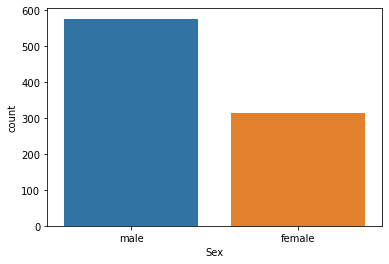

In [42]:
sns.countplot("Sex",data = tia)

#### NO.OF CHILDREN Vs Adult on board

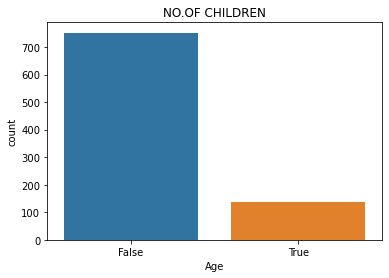

In [43]:
sns.countplot(tia["Age"]<=18)
plt.title("NO.OF CHILDREN")
plt.show()

#### Total No.SURVIVED/DECEASED 

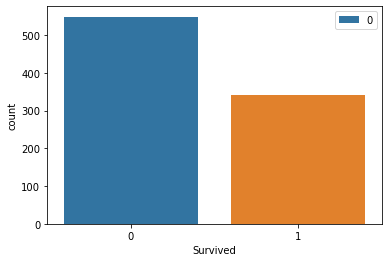

In [44]:
sns.countplot(tia["Survived"])
plt.legend(tia["Survived"])
plt.show()

#Here the graph shows just mere 300 passengers have survived out of 891 passengers

#### Embarkments from different Ports

<AxesSubplot:xlabel='Embarked', ylabel='count'>

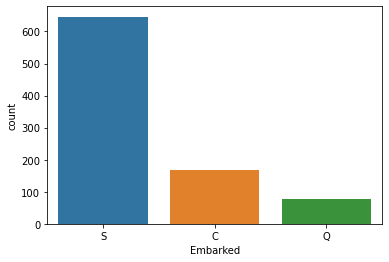

In [45]:
sns.countplot(tia["Embarked"])

#Here you can see more than 600 passengers have boarded from Port "S"

# BIVARIATE ANALYSIS

Lets find Correlation between all the columns 

In [46]:
tia.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034219,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064577,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.340279,0.083081,0.018443,-0.549500
Age,0.034219,-0.064577,-0.340279,1.000000,-0.233114,-0.172435,0.096882
SibSp,-0.057527,-0.035322,0.083081,-0.233114,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172435,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096882,0.159651,0.216225,1.000000


#### HEATMAP

<AxesSubplot:>

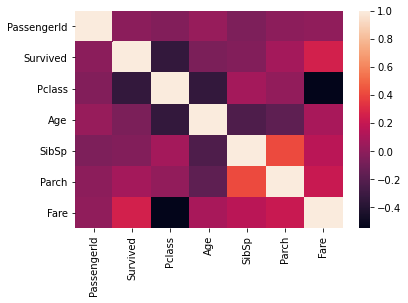

In [47]:
sns.heatmap(tia.corr())

#### TOTAL NO.OF SUVIVED/DECEASED BY FARE PRICES

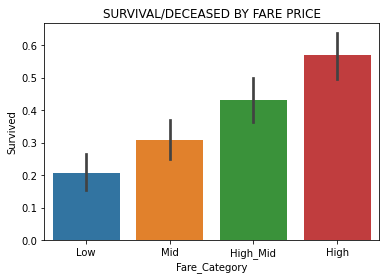

In [48]:
tia["Fare_Category"] = pd.cut(tia["Fare"], bins=[0,7.90,14.45,31.28,120], labels=["Low","Mid","High_Mid","High"])
sns.barplot(x = "Fare_Category",y = "Survived",data = tia)
plt.title("SURVIVAL/DECEASED BY FARE PRICE")
plt.show()

In [56]:
tia.drop("Fare_Category",axis = 1,inplace = True)

In [57]:
tia.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not Known,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not Known,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not Known,S


In [58]:
tia.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#### FARE PRICE DISTRIBUTION TO KNOW MAX NO.OF PEOPLE ON BOARD BY FARE PRICE

Skewness: 4.787316519674893
Kurtosis: 33.39814088089868


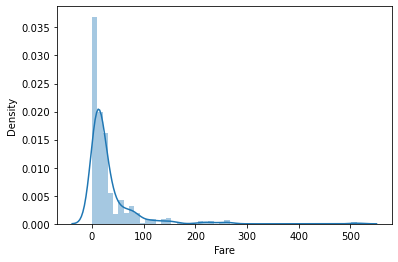

In [59]:
sns.distplot(tia["Fare"])
print("Skewness:",tia["Fare"].skew())
print("Kurtosis:",tia["Fare"].kurt())

above displot shows the distribution of data according to fare price,

-> we can note that the Maximum number of people had paid tickets ranging from 0-100 fare, putting them in the PCLASS category  3 and 2 

->Also the curve represents a right skewed curve , with tail being on the right side suggest a positive curve

-> With Kutosis being positive too as not much fluctuation is seen in the data 

#### SURVIVAL/DECEASED RATE BY GENDER

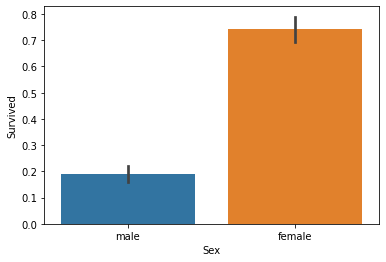

In [60]:
sns.barplot("Sex","Survived",data = tia)
plt.show()

#### SURVIVAL/DECEASED FROM EACH DOCK

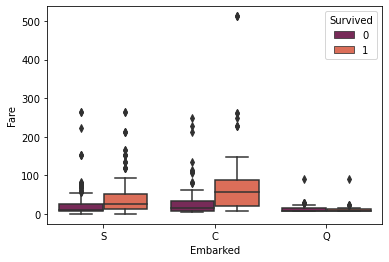

In [61]:
sns.boxplot(x = "Embarked",y = "Fare",hue = "Survived",data = tia,palette = "rocket")
plt.show()

#HERE THE BOX PLOT SHOW THE PEOPLE WHO BOARDED FROM DOCKS "S" AND "C" ARE HIGH AS COMPARE TO DOCK Q, ALSO TO NOTE ,PEOPLE WHO HAVE PAID FOR FARE_CATEGORY MEDIUM CATEGORY AND MID-HIGH HAVE SURVIVED 

In [62]:
tia.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.356902,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.017814,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Scaling 

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
scal_tia = MinMaxScaler()

In [65]:
new_tia = tia

In [68]:
new_tia[["Age","Fare"]] = scal_tia.fit_transform(new_tia[["Age","Fare"]])

In [71]:
new_tia.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.2750,1,0,A/5 21171,0.014151,Not Known,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.4750,1,0,PC 17599,0.139136,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.3250,0,0,STON/O2. 3101282,0.015469,Not Known,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.4375,1,0,113803,0.103644,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.4375,0,0,373450,0.015713,Not Known,S


#### Encoding

In [72]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

###### LabelEncoding:

In [75]:
lr = LabelEncoder()

In [74]:
new_tia["Ticket"].dtype

dtype('O')

In [76]:
new_tia["Cabin"].dtype

dtype('O')

In [79]:
new_tia["Ticket"] = lr.fit_transform(new_tia["Ticket"])

In [80]:
new_tia["Cabin"] = lr.fit_transform(new_tia["Cabin"])

In [81]:
new_tia.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.2750,1,0,523,0.014151,146,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.4750,1,0,596,0.139136,81,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.3250,0,0,669,0.015469,146,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.4375,1,0,49,0.103644,55,S
4,5,0,3,"Allen, Mr. William Henry",male,0.4375,0,0,472,0.015713,146,S


#### OneHot Encoding

In [83]:
new_tia.drop("Name",axis = 1,inplace = True)

In [84]:
new_tia = pd.get_dummies(new_tia,columns = ["Sex","Embarked"],prefix = ["Sex","Embarked"])

In [85]:
new_tia

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0.2750,1,0,523,0.014151,146,0,1,0,0,1
1,2,1,1,0.4750,1,0,596,0.139136,81,1,0,1,0,0
2,3,1,3,0.3250,0,0,669,0.015469,146,1,0,0,0,1
3,4,1,1,0.4375,1,0,49,0.103644,55,1,0,0,0,1
4,5,0,3,0.4375,0,0,472,0.015713,146,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0.3375,0,0,101,0.025374,146,0,1,0,0,1
887,888,1,1,0.2375,0,0,14,0.058556,30,1,0,0,0,1
888,889,0,3,0.3500,1,2,675,0.045771,146,1,0,0,0,1
889,890,1,1,0.3250,0,0,8,0.058556,60,0,1,1,0,0


#### Train/Test Split

In [109]:
new_tia.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [113]:
P = new_tia[["Pclass","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S","Fare"]]
Q = new_tia.Survived

In [114]:
P.shape

(891, 7)

In [115]:
P.head()

,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare
0,3,0,1,0,0,1,0.014151
1,1,1,0,1,0,0,0.139136
2,3,1,0,0,0,1,0.015469
3,1,1,0,0,0,1,0.103644
4,3,0,1,0,0,1,0.015713


In [116]:
Q.shape

(891,)

In [117]:
Q.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(P,Q,train_size=0.8)

#### Model

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [129]:
model.score(X_train,Y_train)

0.773876404494382

In [130]:
model.score(X_test,Y_test)

0.7932960893854749

In [131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [132]:
model = [DecisionTreeClassifier, SVC,RandomForestClassifier,KNeighborsClassifier,GaussianNB]

for mod in model:
    reg = mod()
    reg = reg.fit(X_train,Y_train)
    print(mod , 'accuracy',reg.score(X_test,Y_test))

<class 'sklearn.tree._classes.DecisionTreeClassifier'> accuracy 0.8156424581005587
<class 'sklearn.svm._classes.SVC'> accuracy 0.8156424581005587
<class 'sklearn.ensemble._forest.RandomForestClassifier'> accuracy 0.7988826815642458
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> accuracy 0.7988826815642458
<class 'sklearn.naive_bayes.GaussianNB'> accuracy 0.776536312849162


#### Decision Tree Classifier 

In [152]:
model = tree.DecisionTreeClassifier()

In [153]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [154]:
model.score(X_train,Y_train)

0.9143258426966292

In [155]:
model.score(X_test,Y_test)

0.8156424581005587

In [156]:
y_pred  = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0], dtype=int64)

In [157]:
from sklearn import metrics

In [158]:
metrics.confusion_matrix(Y_test, y_pred)

array([[95, 14],
       [19, 51]], dtype=int64)

In [159]:
accuracy = metrics.accuracy_score(Y_test,y_pred)

In [160]:
accuracy_percentage = 100 * accuracy
accuracy_percentage

81.56424581005587

#### Classification_Report

In [161]:
from sklearn.metrics import classification_report 

In [162]:
report=classification_report(Y_test,y_pred) 
print(report)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       109
           1       0.78      0.73      0.76        70

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



In [171]:
from sklearn import tree
from sklearn import datasets

In [172]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [173]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, Y)

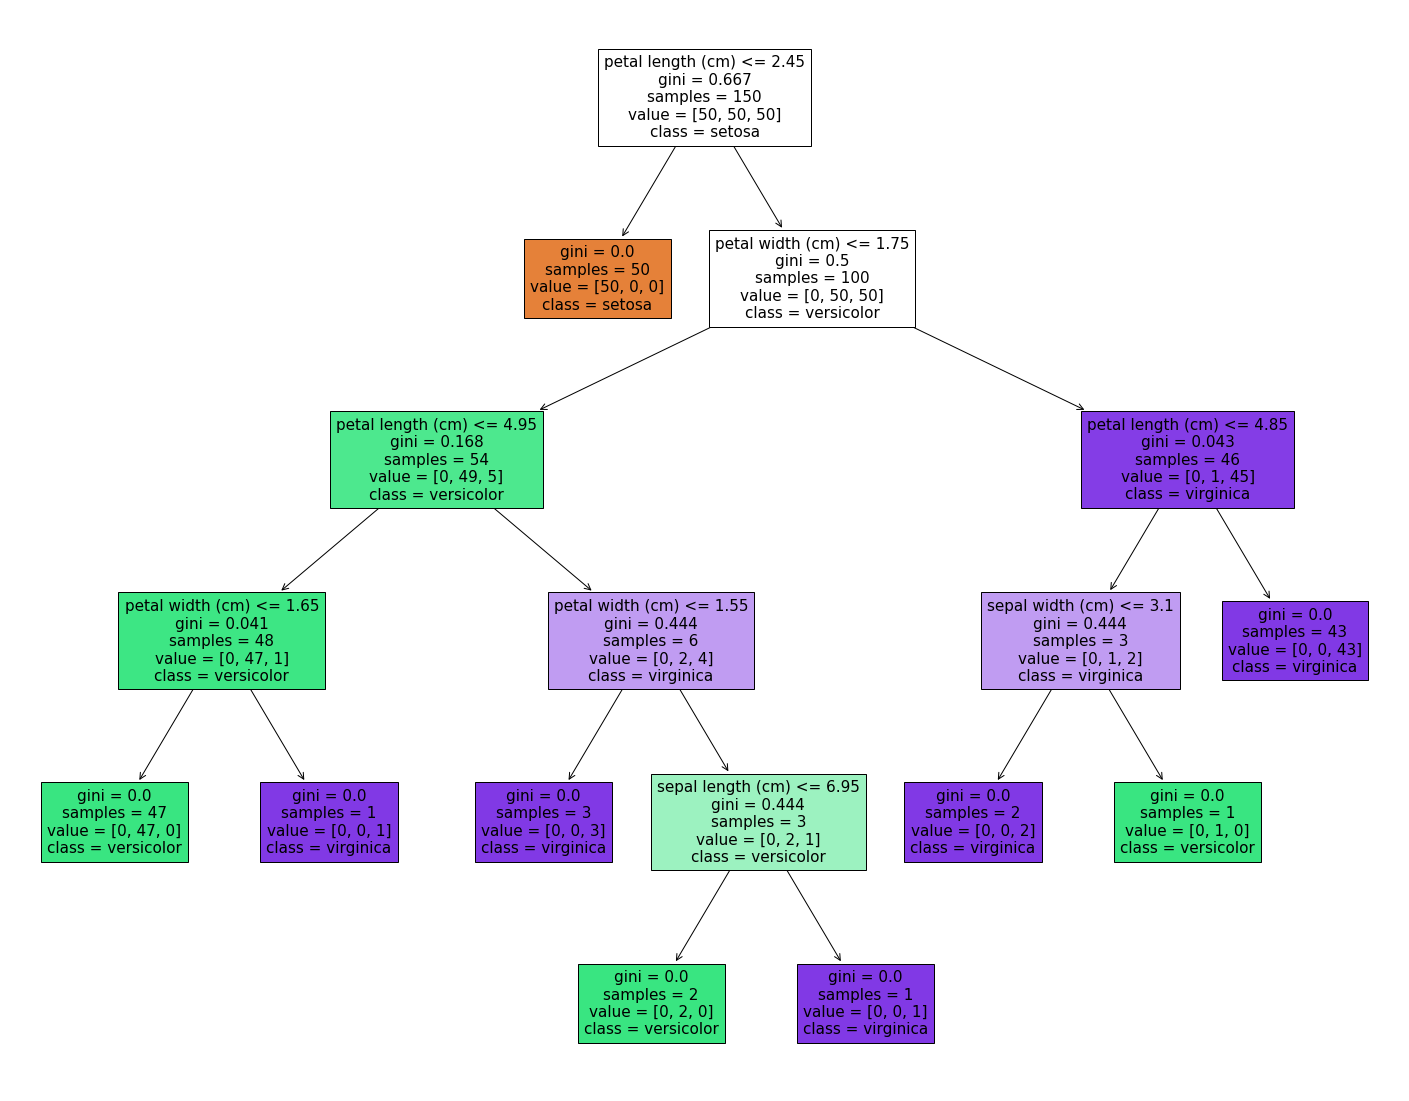

In [174]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [ ]:
#              ---------------------------------------------X---------------------------------------------------